Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
import random as rn 
import warnings
warnings.filterwarnings('ignore')

Importing dataset

In [2]:
dataset = pd.read_csv('Iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset = dataset.drop(columns=['Id'])

In [6]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

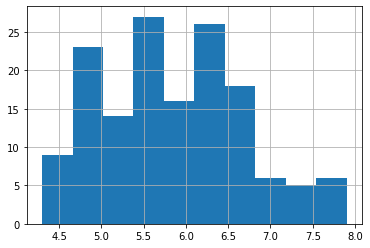

In [10]:
dataset['SepalLengthCm'].hist()

<AxesSubplot:>

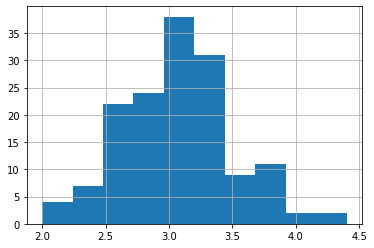

In [11]:
dataset['SepalWidthCm'].hist()

<AxesSubplot:>

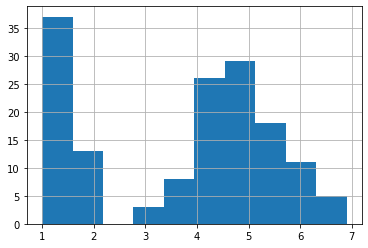

In [12]:
dataset['PetalLengthCm'].hist()

<AxesSubplot:>

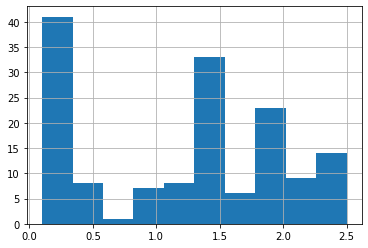

In [13]:
dataset['PetalWidthCm'].hist()

In [14]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

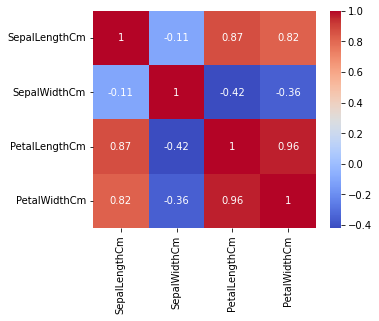

In [15]:
corr = dataset.corr()
fig , ax = plt.subplots(figsize=(5,4))
sb.heatmap(corr , annot= True , ax=ax , cmap = 'coolwarm')

In [16]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier

In [17]:
X = dataset.drop(columns=['Species'])
Y = dataset['Species']

x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size=0.30)

In [18]:
LR = LogisticRegression()
LR.fit(x_train , y_train)
LR.score(x_test , y_test)*100

97.77777777777777

In [19]:
LR.fit(x_train.values , y_train.values)

LogisticRegression()

In [20]:
LR.score(x_test , y_test)*100

97.77777777777777

In [21]:
KNN = KNeighborsClassifier() 
KNN.fit(x_train.values , y_train.values)
KNN.score(x_test , y_test)*100

97.77777777777777

In [22]:
KNN.fit(x_train.values , y_train.values)

KNeighborsClassifier()

In [23]:
KNN.score(x_test , y_test)*100

97.77777777777777

In [24]:
DT = DecisionTreeClassifier()
DT.fit(x_train.values , y_train.values)
DT.score(x_test , y_test)*100

97.77777777777777

In [25]:
DT.fit(x_train.values , y_train.values)

DecisionTreeClassifier()

In [26]:
DT.score(x_test , y_test)*100

97.77777777777777

In [27]:
import pickle
pickle.dump(KNN , open('IrisModel.pkl','wb'))
pickle.dump(KNN , open('sameo.pkl','wb'))


In [28]:
load_model = pickle.load(open('IrisModel.pkl' , 'rb'))
load_model.predict([[6.0 , 2.2 , 4.0 , 1.0]])#<---Input Values

array(['Iris-versicolor'], dtype=object)

In [29]:
load_model.predict([[1.0 , 4.2 , 2.0 , 4.0]])#<-- Same again

array(['Iris-setosa'], dtype=object)